# Introduction to Synthetic Population Generation

In [1]:
from pathlib import Path

import pandas as pd

from caveat.data.synth import ActivityGen
from caveat.data.utils import generate_population, trace_to_pam
from caveat.features.sequence import sequence_prob_plot
from caveat.features.times import (
    joint_time_distributions_plot,
    times_distributions_plot,
)

In [2]:
write_path = Path("tmp/synthetic_population.csv")

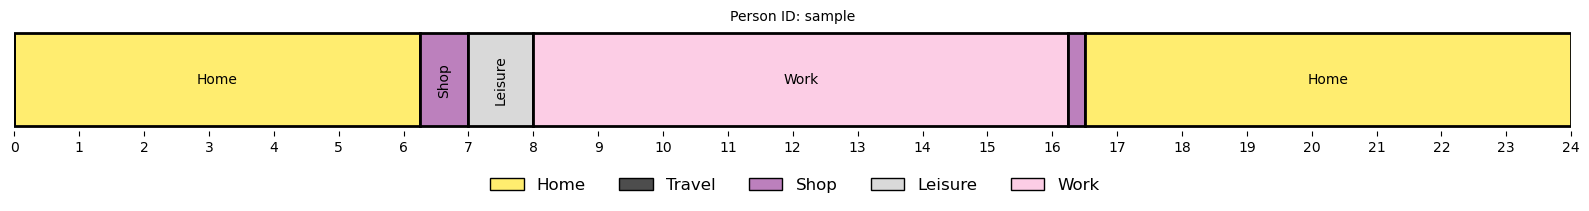

In [3]:
# Example
generator = ActivityGen()
generator.build()

trace = generator.run()
plan = trace_to_pam(trace, generator.map)
plan.plot()

In [4]:
population = generate_population(gen=generator, size=1000)
population.act = population.act.map(generator.map)
population = population[["pid", "act", "start", "end", "duration"]]
population

,pid,act,start,end,duration
0,0,home,0,420,420
1,0,shop,420,465,45
2,0,work,465,990,525
3,0,education,990,1080,90
4,0,home,1080,1275,195
...,...,...,...,...,...
5075,998,home,975,1440,465
5076,999,home,0,375,375
5077,999,work,375,960,585
5078,999,leisure,960,1020,60


In [5]:
write_path.parent.mkdir(exist_ok=True)
population.to_csv(write_path, index=False)

In [6]:
def describe_col(population, col: str) -> pd.DataFrame:
    description = population.groupby("act")[col].describe()[
        ["count", "mean", "std", "min", "max"]
    ]
    description["attribute"] = col
    return description


def describe_cols(population, cols: list[str]) -> pd.DataFrame:
    description = pd.concat(
        [describe_col(population, c) for c in cols], ignore_index=False
    )
    description = description.reset_index().set_index(["attribute", "act"])
    return description


describe_cols(population, ["start", "end", "duration"]).round()

count   mean    std    min     max
attribute act                                           
start     education   458.0  851.0  193.0  390.0  1185.0
          home       2157.0  557.0  522.0    0.0  1365.0
          leisure     622.0  825.0  294.0  375.0  1305.0
          shop        840.0  623.0  289.0  375.0  1185.0
          work       1003.0  420.0   50.0  375.0  1185.0
end       education   458.0  967.0  185.0  405.0  1200.0
          home       2157.0  931.0  511.0  375.0  1440.0
          leisure     622.0  886.0  307.0  390.0  1365.0
          shop        840.0  659.0  286.0  390.0  1200.0
          work       1003.0  931.0   73.0  750.0  1200.0
duration  education   458.0  116.0   50.0   15.0   270.0
          home       2157.0  374.0   77.0   15.0   555.0
          leisure     622.0   61.0   26.0   15.0   180.0
          shop        840.0   35.0   25.0   15.0   165.0
          work       1003.0  512.0   65.0   15.0   660.0

In [7]:
def time_distributions(population: pd.DataFrame, mapping: dict):
    starts = {k: [] for k in mapping.values()}
    ends = {k: [] for k in mapping.values()}
    durations = {k: [] for k in mapping.values()}
    for act, acts in population.groupby("act"):
        starts[act] = list(acts.start)
        ends[act] = list(acts.end)
        durations[act] = list(acts.duration)
    return starts, ends, durations

In [8]:
starts, ends, durations = time_distributions(population, generator.map)

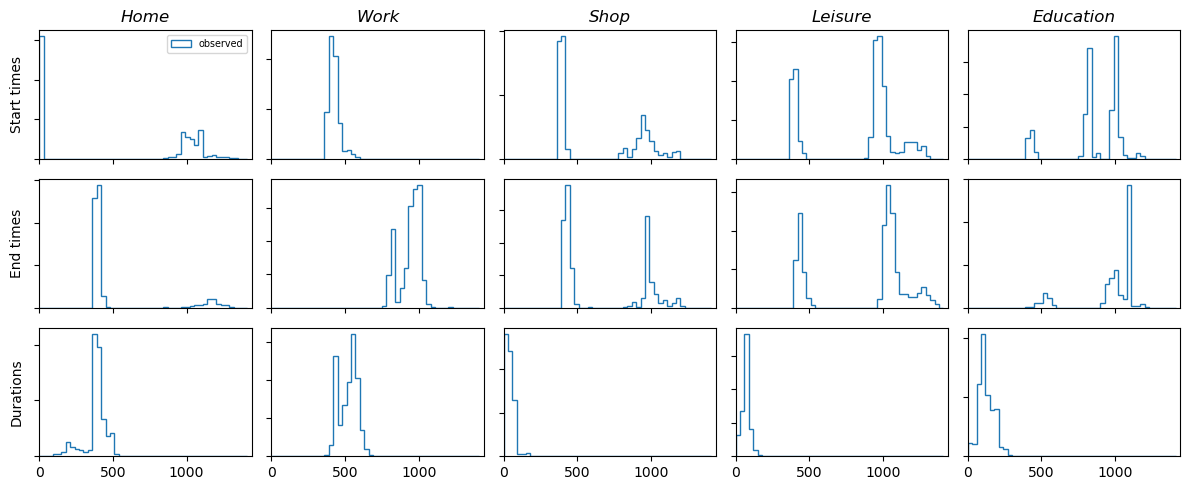

In [9]:
_ = times_distributions_plot(population, ys={})

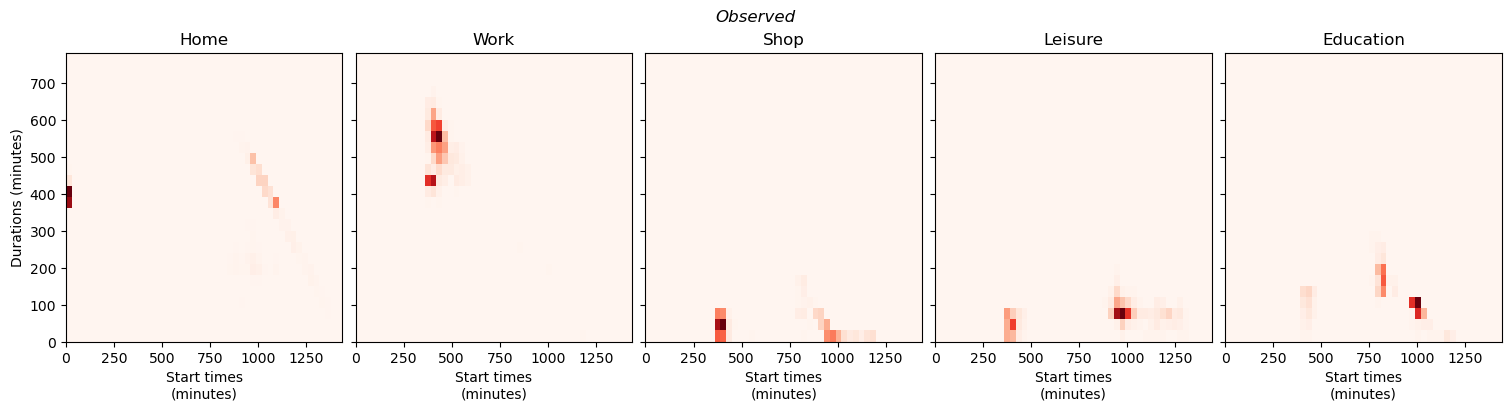

In [10]:
_ = joint_time_distributions_plot(population, ys={})

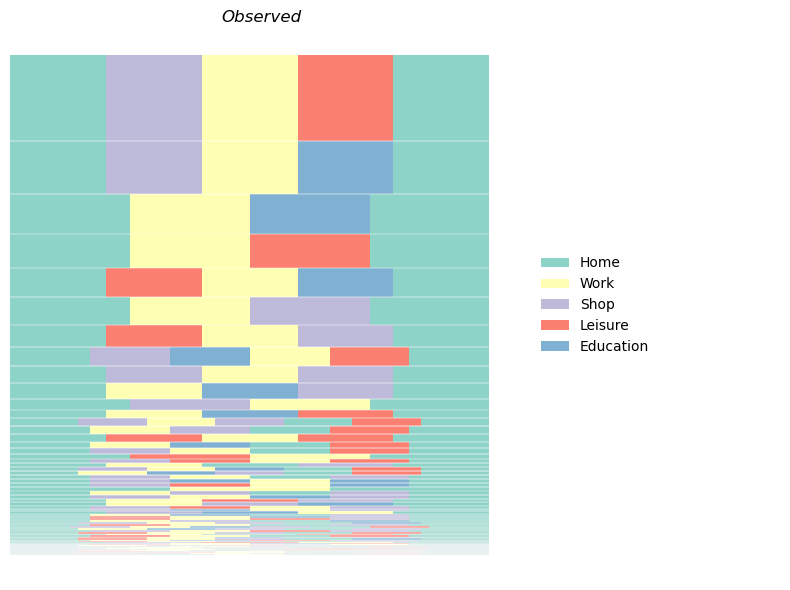

In [11]:
_ = sequence_prob_plot(population, ys={}, figsize=(8, 6))